<a href="https://colab.research.google.com/github/RuslanDX/_Packages-/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
US_2019 = pd.read_json("combined.json")

US_2019 = US_2019.replace(to_replace='None', value=0).dropna()

US_2019['marketCap'] = pd.to_numeric(US_2019['marketCap'])
US_2019['beta'] = pd.to_numeric(US_2019['beta'])
US_2019['price'] = pd.to_numeric(US_2019['price'])
US_2019['SharesOutstanding'] = pd.to_numeric(US_2019['SharesOutstanding'])
US_2019['totalLiabilities'] = pd.to_numeric(US_2019['totalLiabilities'])
US_2019['totalCurrentAssets'] = pd.to_numeric(US_2019['totalCurrentAssets'])
US_2019['netIncome'] = pd.to_numeric(US_2019['netIncome'])
US_2019['Graham'] = (US_2019['totalCurrentAssets'] -  US_2019['totalLiabilities']) / US_2019['SharesOutstanding'] * 100
US_2019['P/E'] = US_2019['price'] *  US_2019['netIncome'] / US_2019['SharesOutstanding']

US_2019 = US_2019[['symbol', 'companyName', 'exchange', 'sector','price', 'beta', 'marketCap', 'Graham', 'P/E']]

US_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
US_2019.replace('', 'Other', inplace=True)
US_2019 = US_2019.dropna()

US_2019 = US_2019.rename(columns={"symbol": "Ticker", "companyName": "Company name", "marketCap":"Market capitalization", "sector":"Sector", "beta":"Beta", "price":"Price", "exchange":"Exchange", "country":"Country", "SharesOutstanding": "Shares outstanding", "totalLiabilities" : "Total liabilities", "totalCurrentAssets":"Total current assets", "netIncome":"Net income"})

Данные по рынку американских акций за 2019 год

In [ ]:
US_2019

array(['Technology', 'Communication Services', 'Consumer Cyclical',
       'Financial Services', 'Healthcare', 'Energy', 'Consumer Defensive',
       'Industrials', 'Utilities', 'Real Estate', 'Basic Materials',
       'Services'], dtype=object)

Данные по рынку американских акций за 2021 год

In [ ]:
US_2022 = pd.read_csv('2021.csv', index_col=0)
US_2022.replace('', 'Other', inplace=True)
US_2022.replace([np.inf, -np.inf], np.nan, inplace=True)

US_2022.replace('Electronic Technology', 'Technology', inplace=True)
US_2022.replace('Technology Services', 'Technology', inplace=True)
US_2022.replace('Electronic Technology', 'Technology', inplace=True)

US_2022 = US_2022.dropna()
US_2022


print(US_2019['Sector'].unique())
print(US_2022['Sector'].unique())

['Technology' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Healthcare' 'Energy' 'Consumer Defensive'
 'Industrials' 'Utilities' 'Real Estate' 'Basic Materials' 'Services']
['Technology' 'Retail Trade' 'Consumer Durables' 'Finance'
 'Health Technology' 'Health Services' 'Energy Minerals'
 'Consumer Non-Durables' 'Commercial Services' 'Communications'
 'Consumer Services' 'Transportation' 'Utilities' 'Producer Manufacturing'
 'Process Industries' 'Industrial Services' 'Non-Energy Minerals'
 'Distribution Services' 'Miscellaneous']


Распределение акций по коэффициенту

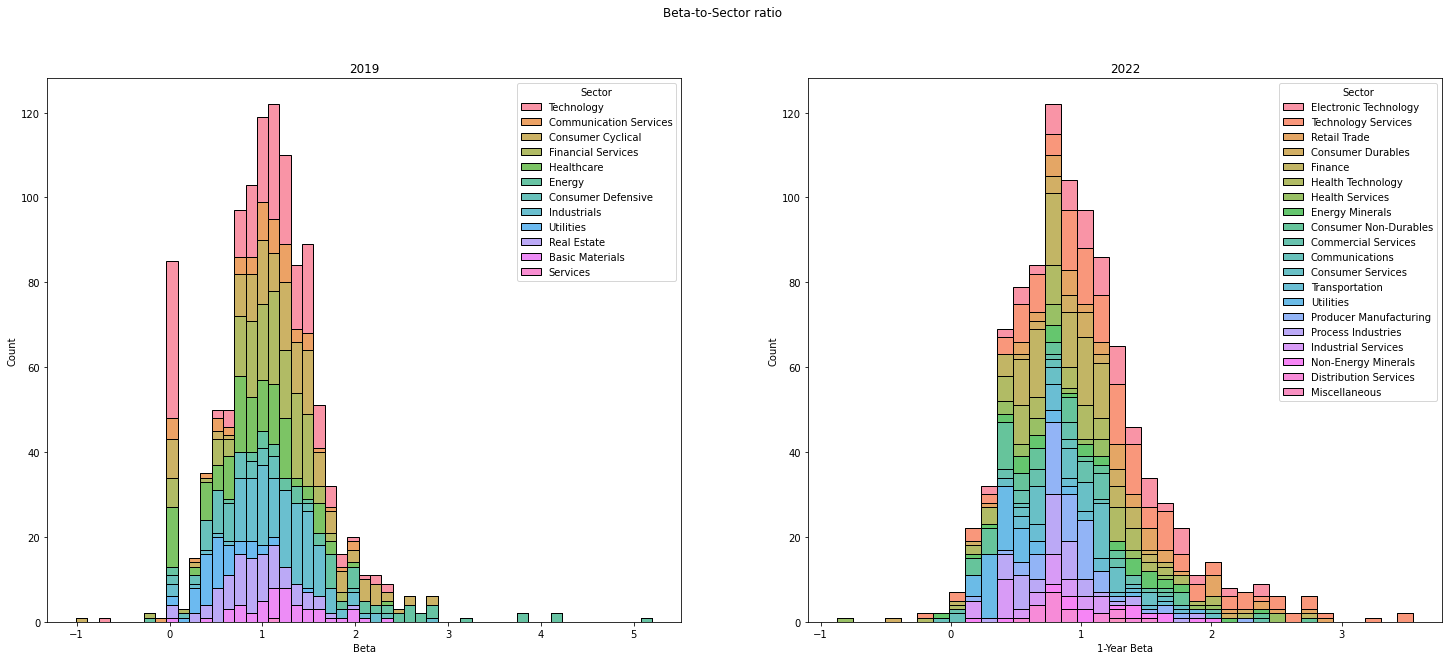

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Beta-to-Sector ratio')

axes[0].set_title("2019")
axes[1].set_title("2022")

_ = sns.histplot(ax=axes[0],data=US_2019, x="Beta", hue="Sector", multiple="stack")
_ = sns.histplot(ax=axes[1],data=US_2022, x="1-Year Beta", hue="Sector", multiple="stack")

Распределение средних цен акций по секторам:

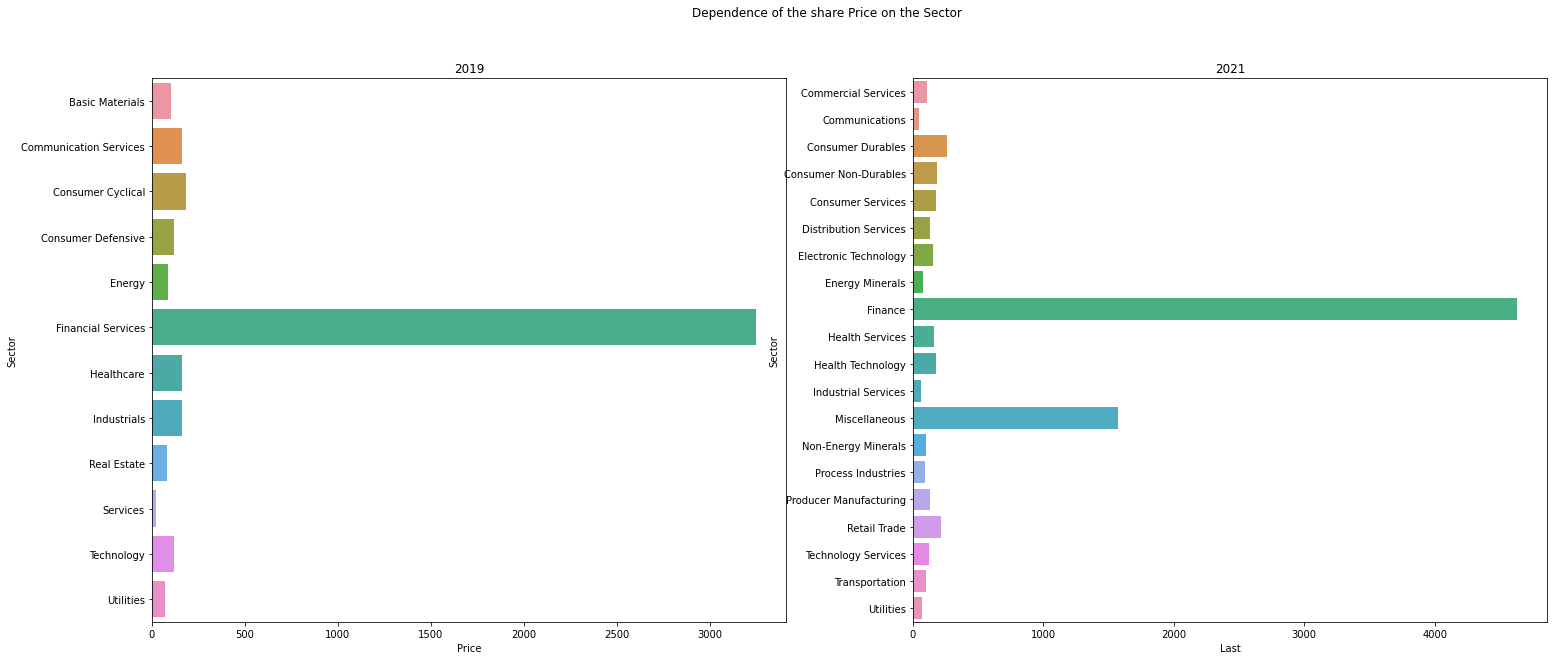

In [ ]:
df_gb_2019 = US_2019.groupby('Sector').mean()[['Price']].reset_index()
df_gb_2022 = US_2022.groupby('Sector').mean()[['Last']].reset_index()

fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Dependence of the share Price on the Sector')

axes[0].set_title("2019")
axes[1].set_title("2021")

_ = sns.barplot(ax=axes[0], data=df_gb_2019, x="Price", y="Sector")
_ = sns.barplot(ax=axes[1], data=df_gb_2022, x="Last", y="Sector")

Коэффициенты линейной корреляции:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_corr = US_2019.copy()

categorial = ['Ticker', 'Company name', 'Exchange', 'Sector']
df_corr[categorial] = df_corr[categorial].apply(le.fit_transform)

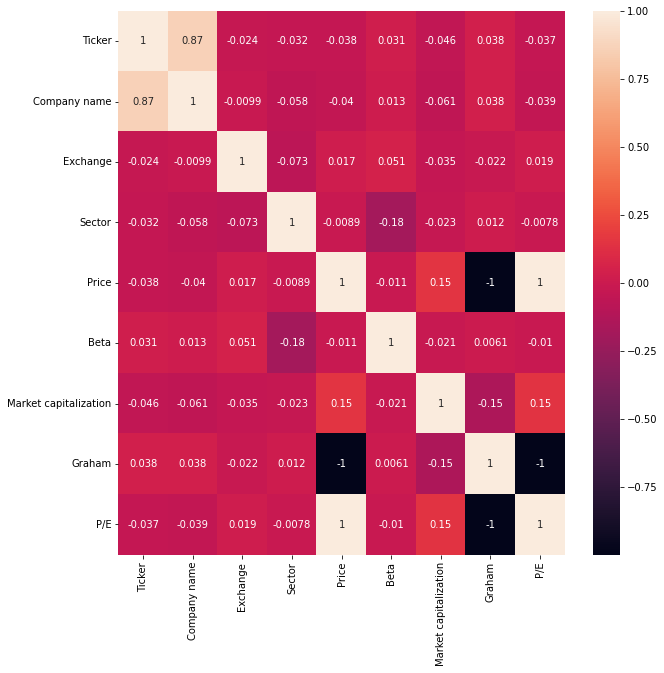

In [ ]:
fig = plt.figure(figsize=(10, 10))
corr = df_corr.corr()
fig.suptitle('Linear correlation coefficient')

hm = sns.heatmap(corr, 
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Распределение доли рынка по секторам экономики:

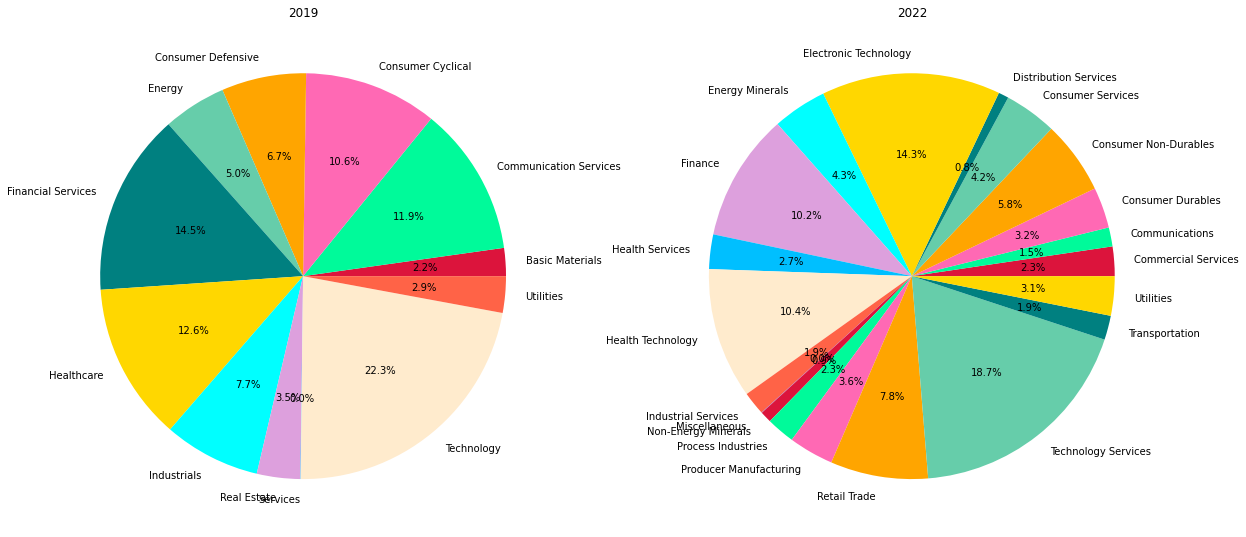

In [ ]:
colors = ['#DC143C','#00FA9A','#FF69B4','#FFA500', '#66CDAA', '#008080', '#FFD700', '#00FFFF', '#DDA0DD', '#00BFFF', '#FFEBCD', '#FF6347', '#7B68EE']
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].set_title("2019")
axes[1].set_title("2021")

data = US_2019[['Sector', 'Market capitalization']].groupby(['Sector']).sum()
labels = US_2019.groupby('Sector').count().reset_index()['Sector'].to_numpy()
_ = axes[0].pie(data['Market capitalization'], colors = colors, labels=labels, autopct='%.1f%%')

data = US_2022[['Sector', 'Market Capitalization']].groupby(['Sector']).sum()
labels = US_2022.groupby('Sector').count().reset_index()['Sector'].to_numpy()
_ = axes[1].pie(data['Market Capitalization'], colors = colors, labels=labels, autopct='%.1f%%')

Распределение компаний по коэффициенту Грэма:

In [ ]:
US_2022['Graham'] = (US_2022['Total Current Assets (MRQ)'] -  US_2022['Total Liabilities (MRQ)']) / US_2022['Total Shares Outstanding (MRQ)'] * 100

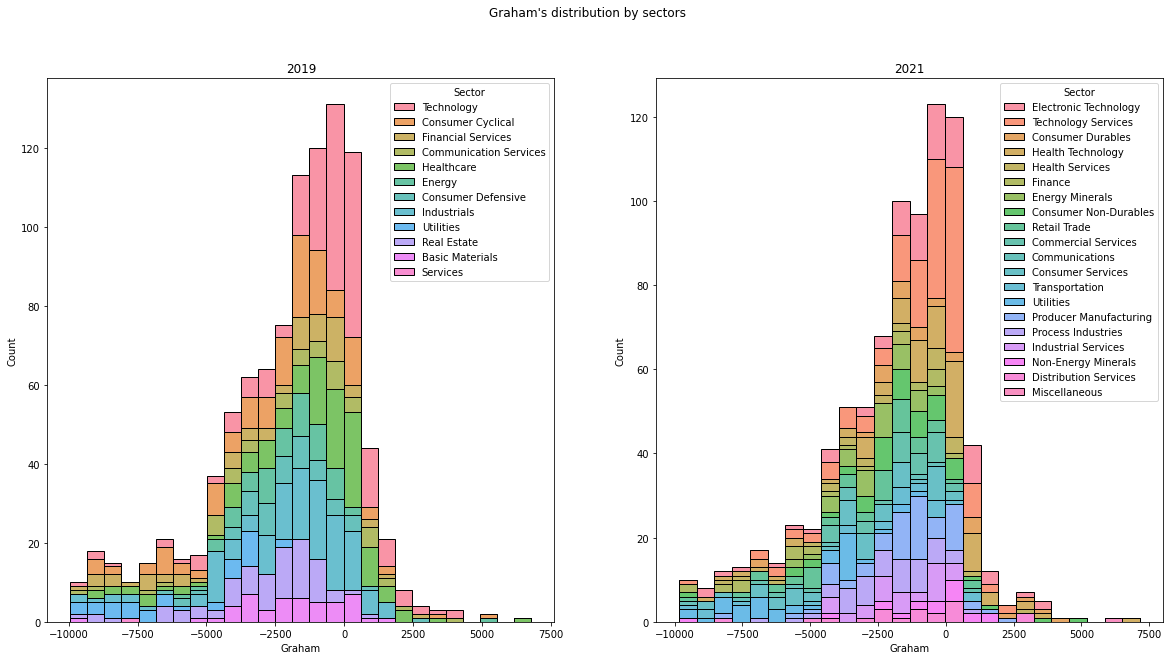

In [ ]:
df_19 = US_2019.loc[(US_2019['Graham'] > -10000) & (US_2019['Graham'] < 10000)]
df_22 = US_2022.loc[(US_2022['Graham'] > -10000) & (US_2022['Graham'] < 10000)]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Graham\'s distribution by sectors')

axes[0].set_title("2019")
axes[1].set_title("2021")

_ = sns.histplot(ax=axes[0], data=df_19, x="Graham", hue="Sector", multiple="stack")
_ = sns.histplot(ax=axes[1], data=df_22, x="Graham", hue="Sector", multiple="stack")

Распределение секторов экономики по средней стоимости акций:

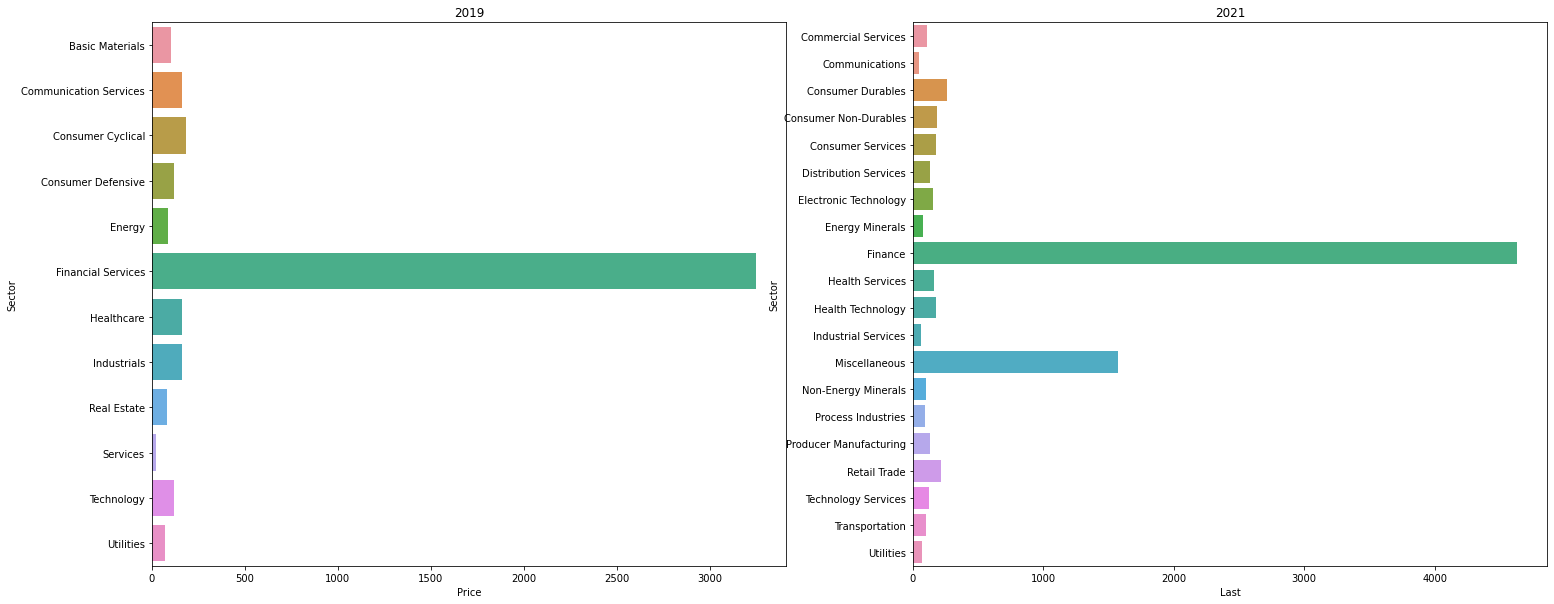

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

axes[0].set_title("2019")
axes[1].set_title("2021")

_ = sns.barplot(ax=axes[0], data=df_gb_2019, x="Price", y="Sector")
_ = sns.barplot(ax=axes[1], data=df_gb_2022, x="Last", y="Sector")

## Кластеризация компаний по коэффициенту Грэма:

In [ ]:
big_22 = pd.read_csv('america.csv', index_col=0)
big_22['Graham'] = (big_22['Total Current Assets (MRQ)'] -  big_22['Total Liabilities (MRQ)']) / big_22['Total Shares Outstanding (MRQ)'] * 100

Коэффициент <60% - бумага слишком недооценена:

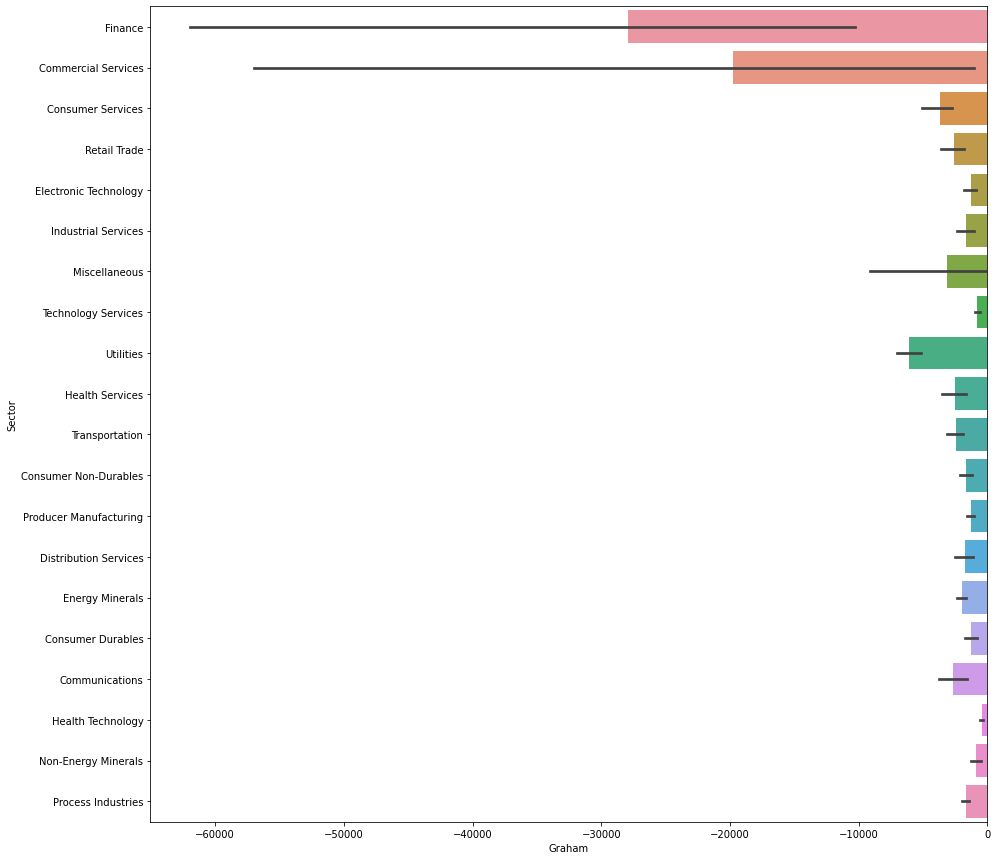

In [ ]:
plt.figure(figsize=(15, 15))
fig.suptitle('Extra underestimated')
g = sns.barplot(data=data1, x="Graham", y="Sector")

In [ ]:
data1 = big_22.loc[(big_22['Graham'] < 60)]
data1 = data1.sort_values(by=['Graham'])
data1

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham
Ticker,,,,,,,,,,,
BRK.A,Berkshire Hathaway Inc.,478669.5000,7.040589e+11,Finance,0.652477,55762.0000,United States,1.931500e+11,4.526410e+11,1.470874e+06,-1.764196e+07
STGW,Stagwell Inc.,8.0400,2.396287e+09,Commercial Services,0.998906,0.1069,United States,1.022378e+09,3.109755e+09,7.892000e+04,-2.644928e+06
FCNCA,"First Citizens BancShares, Inc.",693.8300,1.105833e+10,Finance,0.877861,56.0768,United States,1.103800e+10,9.802700e+10,1.600159e+07,-5.436272e+05
JXN,Jackson Financial Inc.,36.2400,3.150656e+09,Finance,1.416840,26.2812,United States,4.110000e+09,3.099500e+11,8.590247e+07,-3.560317e+05
SIVB,SVB Financial Group,492.0200,2.895595e+10,Finance,1.662622,29.9064,United States,2.113900e+10,2.039950e+11,5.885120e+07,-3.107090e+05
...,...,...,...,...,...,...,...,...,...,...,...
IDEX,"Ideanomics, Inc.",0.6323,3.146836e+08,Technology Services,1.798370,-0.2889,United States,3.563070e+08,6.201300e+07,4.976810e+08,5.913306e+01
NN,NextNav Inc.,3.5000,3.379972e+08,Technology Services,1.279308,-1.3094,United States,9.672500e+07,3.920000e+07,9.657060e+07,5.956782e+01
APDN,"Applied DNA Sciences, Inc.",1.2300,1.012822e+07,Health Technology,0.883969,-1.9252,United States,1.115552e+07,6.232724e+06,8.234320e+06,5.978382e+01


Коэффициент 60-75% - бумага недооценена:

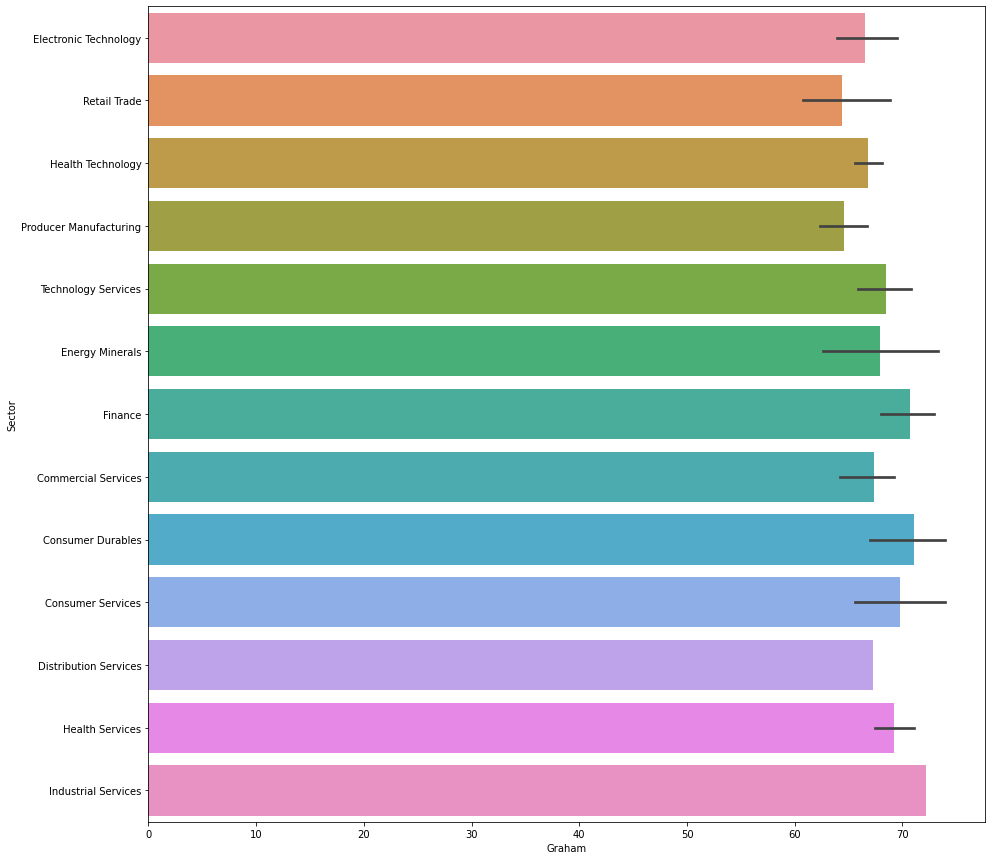

In [ ]:
plt.figure(figsize=(15, 15))
fig.suptitle('Underestimated')
g = sns.barplot(data=data2, x="Graham", y="Sector")

In [ ]:
data2 = big_22.loc[(big_22['Graham'] >= 60)&(big_22['Graham'] <= 75)]
data2 = data2.sort_values(by=['Graham'])
data2

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham
Ticker,,,,,,,,,,,
TGAN,"Transphorm, Inc.",5.45,2.907082e+08,Electronic Technology,0.153928,NaN,United States,5.066100e+07,1.862300e+07,53341000.0,60.062616
ATER,"Aterian, Inc.",3.35,2.189644e+08,Retail Trade,0.946333,-5.2369,United States,1.390160e+08,9.966800e+07,65362500.0,60.199656
CYAN,Cyanotech Corporation,2.92,1.808697e+07,Health Technology,0.668726,0.2723,United States,1.584100e+07,1.210400e+07,6194170.0,60.330924
CLVR,Clever Leaves Holdings Inc.,1.14,4.575862e+07,Health Technology,3.415749,-1.7993,United States,6.915600e+07,4.476900e+07,40139161.0,60.756128
CTMX,"CytomX Therapeutics, Inc.",1.62,1.059453e+08,Health Technology,-0.080464,-1.4085,United States,2.684440e+08,2.286310e+08,65398300.0,60.877729
...,...,...,...,...,...,...,...,...,...,...,...
FLUX,"Flux Power Holdings, Inc.",2.55,4.079148e+07,Consumer Services,2.689526,-1.1342,United States,3.482300e+07,2.298700e+07,15996700.0,73.990260
NGMS,NeoGames S.A.,13.43,3.433392e+08,Technology Services,1.470540,-0.0056,Luxembourg,5.437600e+07,3.539400e+07,25565100.0,74.249661
ARVL,Arrival,1.81,1.155284e+09,Consumer Durables,1.962676,NaN,Luxembourg,1.022018e+09,5.468795e+08,638278000.0,74.440617



Коэффициент >75% - бумага переоценена:

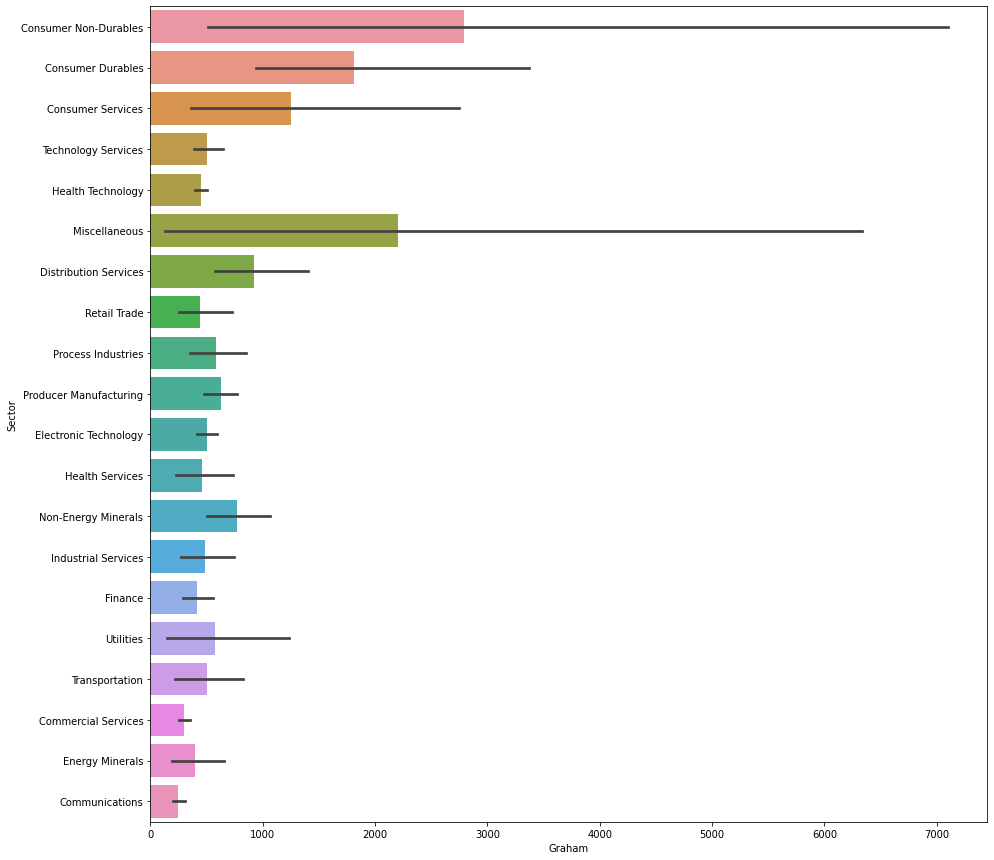

In [ ]:
plt.figure(figsize=(15, 15))
fig.suptitle('Overestimated')
g = sns.barplot(data=data3, x="Graham", y="Sector")

In [ ]:
data3 = big_22.loc[(big_22['Graham'] > 75)]
data3 = data3.sort_values(by=['Graham'], ascending=False)
data3

,Description,Last,Market Capitalization,Sector,1-Year Beta,Basic EPS (TTM),Country,Total Current Assets (MRQ),Total Liabilities (MRQ),Total Shares Outstanding (MRQ),Graham
Ticker,,,,,,,,,,,
SEB,Seaboard Corporation,4189.1600,4.862689e+09,Consumer Non-Durables,0.665021,425.5763,United States,4.069000e+09,3.135000e+09,1160780.0,80463.136856
NVR,"NVR, Inc.",4467.7600,1.469744e+10,Consumer Durables,0.907450,404.2829,United States,4.443937e+09,3.000614e+09,3289670.0,43874.400776
DJCO,Daily Journal Corp. (S.C.),277.9700,3.838060e+08,Consumer Services,0.959307,14.6435,United States,3.733030e+08,1.563840e+08,1380750.0,15710.229947
GOOG,Alphabet Inc.,2255.9800,1.482331e+12,Technology Services,1.159636,112.1817,United States,1.778530e+11,1.030920e+11,658544000.0,11352.468476
MTH,Meritage Homes Corporation,85.7700,3.147334e+09,Consumer Durables,0.830194,21.9914,United States,4.805168e+09,1.889846e+09,36695100.0,7944.717415
...,...,...,...,...,...,...,...,...,...,...,...
LMNL,Liminal BioSciences Inc.,0.5145,1.597140e+07,Health Technology,0.995335,-3.1997,Canada,9.074853e+07,7.296996e+07,23313000.0,76.260324
UPWK,Upwork Inc.,18.9900,2.462077e+09,Technology Services,1.906406,-0.5692,United States,9.495340e+08,8.509270e+08,129651000.0,76.055719
TGTX,"TG Therapeutics, Inc.",5.1700,7.467309e+08,Health Technology,1.562070,-2.4590,United States,2.422160e+08,1.326420e+08,144435000.0,75.863883
